# Star Type Classifier Notebook

This is a notebook, where I will create a machine learning model to classify a star type based on its parameters, such as luminosity, radius, etc.

## Imports

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Loading the dataset 

In [7]:
Dataset = pd.read_csv('../Data/StarsDataset.csv')
Dataset.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Exploratory Data Analysis

 I think it'll be interesting to first see the correlation between the different parameters in our dataset, but first we'll have to exclude the star type column because it is what we'll be predicting based on the rest of the data. Let's exclude it from the dataset. 

In [15]:
Dataset_StarType_Dropped = Dataset.drop('Star type', axis=1)
Dataset_StarType_Dropped

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


Now that we've removed that column, we can get to work ! Let's build the correlations heatmap!

<AxesSubplot:>

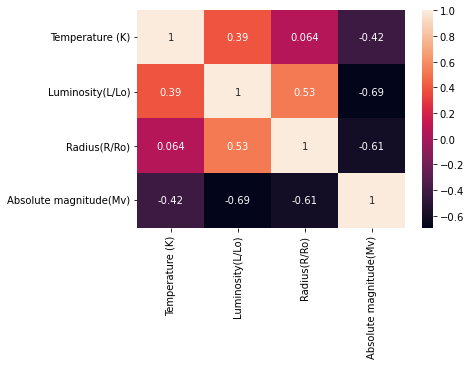

In [18]:
sns.heatmap(Dataset_StarType_Dropped.corr(), annot=True)

There are some very interesting things going on here! First the luminosity of a star is strongly correlated with its temperature The second hting is that the aboslute magnitude of a star is negative correlated with its temperature, luminosity and radius. The strongest correlation is between the radius of a star and its luminosity.

It'll also be interesting to see what would the scatterplot of diffferent parameters, compared to their star's spectral classe, look like.

/home/martin/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature (K)', ylabel='Spectral Class'>

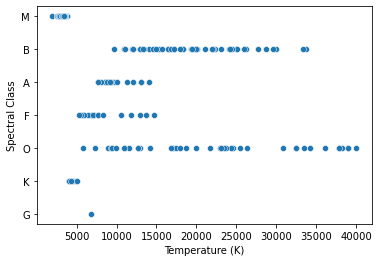

In [26]:
sns.scatterplot(Dataset_StarType_Dropped['Temperature (K)'], Dataset_StarType_Dropped['Spectral Class'])

/home/martin/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Luminosity(L/Lo)', ylabel='Spectral Class'>

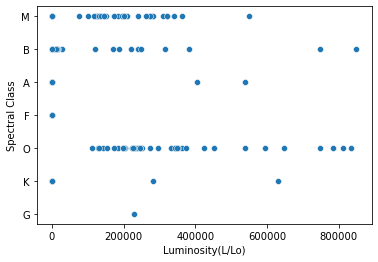

In [23]:
sns.scatterplot(Dataset_StarType_Dropped['Luminosity(L/Lo)'], Dataset_StarType_Dropped['Spectral Class'])

/home/martin/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Radius(R/Ro)', ylabel='Spectral Class'>

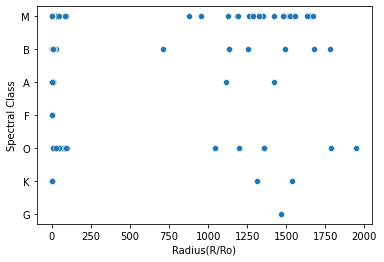

In [24]:
sns.scatterplot(Dataset_StarType_Dropped['Radius(R/Ro)'], Dataset_StarType_Dropped['Spectral Class'])

/home/martin/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Absolute magnitude(Mv)', ylabel='Spectral Class'>

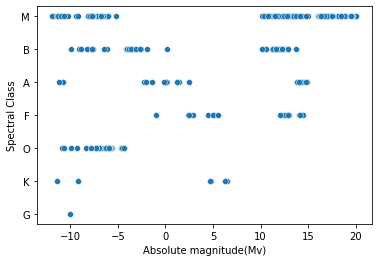

In [25]:
sns.scatterplot(Dataset_StarType_Dropped['Absolute magnitude(Mv)'], Dataset_StarType_Dropped['Spectral Class'])

Most of the spectral class B stars in the dataset are with a temperature range between 10000 to approximately 30000 kelvin. Stars of spectral class M seem to be the stars with the lowest luminosity, lowest tempreature, and biggest radius out of all the other spectral classes. In fact, it seems that stars of spectral class M are the most common stars in our dataset (perhaps in the universe too?)

All of those observations are actually in-line with the <a href='https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram'>Herzsprung-Russel diagram.</a>

Let's now see which stars are the most and least common in our dataset. We'll do that using a histogram.

Text(0.5, 1.0, 'Spectral classes amount')

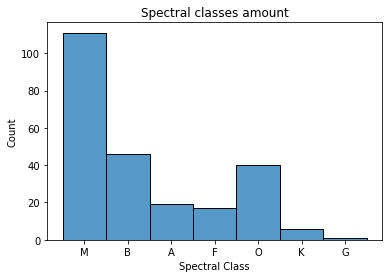

In [34]:
sns.histplot(Dataset_StarType_Dropped['Spectral Class'])
plt.title('Spectral classes amount')

Apparently, stars of type M, B, and O are the most common ones and A,F,K, and G are the least common ones. What does that tell us?